<div class="alert alert-block alert-warning">
    <b>Warning:</b> The content of the note may contain copyrighted material. Do not distribute.
</div>

# Scientific Computing

Seho Jeong, Sogang University

**References**
- **Coleman, Chase, Spencer Lyon, and Jesse Perla. n.d.** "Introduction to Economic Modeling and Data Science." QuantEcon. https://datascience.quantecon.org/.
- **Sargent, Thomas J., and John Stachurski. n.d.** "Python Programming for Economics and Finance." QuantEcon. https://python-programming.quantecon.org/intro.html.

## NumPy

**NumPy (Numerical Python)** is a first-rate library for **numerical programming**.
- Widely used in academia, finance and industry.
- Mature, fast, stable and under continuous development.

We have already seen some code involving NumPy in the preceding note. In this section, we will start a more systematic discussion of both NumPy **arrays** and the fundamental **array processing operations** provided by NumPy. 

### NumPy Arrays

The essential problem that NumPy solves is **fast array processing**. The most important structure that NumPy defines is an array data type formally called a `numpy.ndarray`. NumPy arrays power a large proportion of the scientific Python ecosystem.

Let’s first import the library.

In [2]:
import numpy as np

To create a NumPy array containing only zeros, we use `np.zeros`

In [3]:
# 괄호 안 인자로는 일반적으로 배열의 모양(shape)을 씁니다.
# shape이 무엇인지는 나중에 더 자세히 배웁니다.
a = np.zeros(3) # 0 세 개로 이루어진 넘파이 배열을 변수 a에 할당한다.
a

array([0., 0., 0.])

In [4]:
type(a)

numpy.ndarray

NumPy arrays are somewhat like native Python lists, except that
- Data must be homogeneous (all elements of the same type).
- These types must be one of the data types (`dtypes`) provided by NumPy.

The most important of these dtypes are:
    - float64: 64 bit floating-point number
    - int64: 64 bit integer
    - bool: 8 bit True or False

There are also dtypes to represent complex numbers, unsigned integers, etc. On modern machines, the default dtype for arrays is `float64`.

In [5]:
# Note that the data type of an element of numpy.ndarray is not simply `float` but `numpy.float64`.
a = np.zeros(3)
type(a[0])

numpy.float64

If we want to use integers we can specify as follows:

In [6]:
# Similarly, Numpy uses its own data type. (`numpy.int64` in this case)
a = np.zeros(3, dtype=int)
type(a[0])

numpy.int64

### Shape and Dimension

Consider the following assignment

In [7]:
z = np.zeros(10)
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Here `z` is a flat array with no dimension — neither row nor column vector. The dimension is recorded in the `shape` attribute, which is a tuple.

In [8]:
z.shape

(10,)

Here the shape tuple has only one element, which is the length of the array (tuples with one element end with a comma). To give it dimension, we can change the `shape` attribute

In [9]:
z.shape = (10, 1)
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
z = np.zeros(4)
z.shape = (2, 2)
z

array([[0., 0.],
       [0., 0.]])

In the last case, to make the 2 by 2 array, we could also pass a tuple to the `zeros()` function, as in `z = np.zeros((2, 2))`.

In [11]:
z = np.zeros((2, 2))
z

array([[0., 0.],
       [0., 0.]])

### Creating Arrays

As we’ve seen, the `np.zeros` function creates an array of zeros. You can probably guess what `np.ones` creates. Related is `np.empty`, which creates arrays in memory that can later be populated with data.

In [12]:
z = np.ones(3)
z

array([1., 1., 1.])

In [13]:
z = np.empty(4)
z

array([0., 0., 0., 0.])

The numbers you see here are garbage values. (Python allocates 3 contiguous 64 bit pieces of memory, and the existing contents of those memory slots are interpreted as `float64` values)

To set up a grid of evenly spaced numbers use `np.linspace`

In [14]:
z = np.linspace(2, 4, 5)  # From 2 to 4, with 5 elements
z

array([2. , 2.5, 3. , 3.5, 4. ])

To create an identity matrix use either `np.identity` or `np.eye`

In [15]:
z = np.identity(2)
z

array([[1., 0.],
       [0., 1.]])

In [16]:
z = np.eye(2)
z

array([[1., 0.],
       [0., 1.]])

In addition, NumPy arrays can be **created from Python lists, tuples, etc.** using `np.array`.

In [17]:
z = np.array([10, 20])  # ndarray from Python list
z

array([10, 20])

In [18]:
type(z)

numpy.ndarray

In [19]:
z = np.array((10, 20), dtype=float)    # Here 'float' is equivalent to 'np.float64'
z

array([10., 20.])

In [20]:
z = np.array([[1, 2], [3, 4]])         # 2D array from a list of lists
z

array([[1, 2],
       [3, 4]])

See also `np.asarray`, which performs a similar function, but does not make a distinct copy of data already in a NumPy array.

In [21]:
na = np.linspace(10, 20, 2)
na is np.asarray(na)   # Does not copy NumPy arrays

True

In [22]:
na is np.array(na)     # Does make a new copy --- perhaps unnecessarily

False

In [23]:
np.asarray

<function numpy.asarray>

To read in the array data from a text file containing numeric data use `np.loadtxt` or` np.genfromtxt`—see the [documentation](https://numpy.org/doc/stable/reference/routines.io.html) for details.

### Array Indexing

For a flat array, indexing is the same as Python sequences:

In [24]:
z = np.linspace(1, 2, 5)
z

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [25]:
z[0]

1.0

In [26]:
z[0:2]  # Two elements, starting at element 0

array([1.  , 1.25])

In [27]:
z[-1]

2.0

For 2D arrays the index syntax is as follows:

In [28]:
z = np.array([[1, 2], [3, 4]])
z

array([[1, 2],
       [3, 4]])

In [29]:
z[0, 0]

1

In [30]:
z[0, 1]

2

And so on. Note that **indices are still zero-based**, to maintain compatibility with Python sequences. 

Columns and rows can be extracted as follows:

In [31]:
z[0, :] # 1st row

array([1, 2])

In [32]:
z[:, 1] # 2nd column

array([2, 4])

NumPy arrays of **integers can also be used to extract elements:**

In [33]:
z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [34]:
indices = np.array((0, 2, 3))
z[indices] # 1st, 3rd, 4th element of z; output is a numpy.array

array([2. , 3. , 3.5])

Finally, an array of **dtype bool can be used to extract elements**.

In [35]:
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [36]:
d = np.array([0, 1, 1, 0, 0], dtype=bool) # if 0, then false; if 1, then true.
d

array([False,  True,  True, False, False])

In [37]:
z[d] # True인 자리의 원소를 추출한다.

array([2.5, 3. ])

We’ll see why this is useful below. An aside: all elements of an array can be set equal to one number using slice notation.

In [38]:
z = np.empty(3)
z

array([2. , 3. , 3.5])

In [39]:
z[:] = 42 # all elements of an array are set equal
z

array([42., 42., 42.])

### Array Methods

Arrays have useful methods, all of which are carefully optimized.

In [40]:
a = np.array((4, 3, 2, 1))
a

array([4, 3, 2, 1])

In [41]:
a.sort()              # Sorts a in place
a

array([1, 2, 3, 4])

In [42]:
a.sum()               # Sum

10

In [43]:
a.mean()              # Mean

2.5

In [44]:
a.max()               # Max

4

In [45]:
a.argmax()            # Returns the `index` of the maximal element

3

In [46]:
a.cumsum()            # Cumulative sum of the elements of a; [1st, 1st+2nd, 1st+2nd+3rd, 1st+2nd+3rd+4th, ...]

array([ 1,  3,  6, 10])

In [47]:
a.cumprod()           # Cumulative product of the elements of a; [1st, 1st*2nd, 1st*2nd*3rd, 1st*2nd*3rd*4th, ...]

array([ 1,  2,  6, 24])

In [48]:
a.var()               # Variance

1.25

In [49]:
a.std()               # Standard deviation

1.118033988749895

In [50]:
a.shape = (2, 2)
print(a)
print()
a.T                   # Equivalent to a.transpose()

[[1 2]
 [3 4]]



array([[1, 3],
       [2, 4]])

Another method worth knowing is `searchsorted()`. If `z` is a nondecreasing array, then `z.searchsorted(a)` returns the index of the first element of z that is `>= a`.

In [51]:
z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [52]:
z.searchsorted(2.2) # 2nd element

1

Many of the methods discussed above have equivalent functions in the NumPy namespace.

```python
np.function_name(array) == array.function_name()
```

In [53]:
a = np.array((4, 3, 2, 1))

In [54]:
np.sum(a)

10

In [55]:
np.mean(a)

2.5

### Arithmetic Operations

The operators `+`, `-`, `*`, `/` and `**` all act **elementwise** on arrays

In [56]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
a + b

array([ 6,  8, 10, 12])

In [57]:
a * b

array([ 5, 12, 21, 32])

We can add a scalar to each element as follows

In [58]:
a + 10

array([11, 12, 13, 14])

Scalar multiplication is similar

In [59]:
a * 10

array([10, 20, 30, 40])

The two-dimensional arrays follow the same general rules : an **elementwise** operation

In [60]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A + B

array([[2., 2.],
       [2., 2.]])

In [61]:
A + 10

array([[11., 11.],
       [11., 11.]])

In [62]:
A * B

array([[1., 1.],
       [1., 1.]])

In particular, `A * B` is not the matrix product, it is an element-wise product.

### Matrix Multiplication

With Anaconda’s scientific Python package based around Python 3.5 and above, one can use the `@` symbol for matrix multiplication, as follows:

In [63]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A @ B

array([[2., 2.],
       [2., 2.]])

For older versions of Python and NumPy you need to use the `np.dot` function. We can also use `@` to take the **inner product** of two **flat** arrays.

In [64]:
A = np.array((1, 2))
B = np.array((10, 20))
A @ B # 1*10 + 2*20

50

In fact, we can use `@` when one element is a Python `list` or `tuple`.

In [65]:
A = np.array(((1, 2), (3, 4)))
A

array([[1, 2],
       [3, 4]])

In [66]:
A @ (0, 1)

array([2, 4])

Since we are post-multiplying, **the tuple is treated as a column vector**.

In [67]:
(0, 1) @ A # (0, 1) here is a row vector.

array([3, 4])

### Broadcasting

> Broadcasting is a very important aspect of NumPy.

At the same time, advanced broadcasting is relatively complex and some of the details below can be skimmed on first pass.

In element-wise operations, arrays may not have the same shape. When this happens, **NumPy will automatically expand arrays to the same shape whenever possible**. This useful (but sometimes confusing) feature in NumPy is called **broadcasting**.

The value of broadcasting is that
- `for` loops can be avoided, which helps numerical code run fast and
- broadcasting can allow us to implement operations on arrays without actually creating some dimensions of these arrays in memory, which can be important when arrays are large.

For example, suppose `a` is a 3 × 3 array (`a -> (3, 3)`), while `b` is a flat array with three elements (`b -> (3,)`). When adding them together, NumPy will automatically expand `b -> (3,)` to `b -> (3, 3)`. The element-wise addition will result in a 3 × 3 array.

In [68]:
a = np.array(
        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]])
b = np.array([3, 6, 9])

a + b

array([[ 4,  8, 12],
       [ 7, 11, 15],
       [10, 14, 18]])

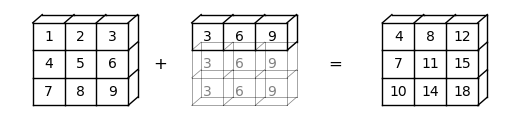

How about `b -> (3, 1)`? In this case, NumPy will automatically expand `b -> (3, 1)` to `b -> (3, 3)`. Element-wise addition will then result in a 3 × 3 matrix.

In [ ]:
b.shape = (3, 1)

a + b

array([[ 4,  5,  6],
       [10, 11, 12],
       [16, 17, 18]])

Here is a visual representation of this broadcasting operation:

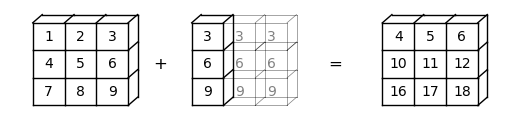

The previous broadcasting operation is equivalent to the following `for` loop

In [ ]:
row, column = a.shape
result = np.empty((3, 3))
for i in range(row):
    for j in range(column):
        result[i, j] = a[i, j] + b[i]

result

In some cases, both operands will be expanded. When we have `a -> (3,)` and `b -> (3, 1)`, a will be expanded to `a -> (3, 3)`, and `b` will be expanded to `b -> (3, 3)`. In this case, element-wise addition will result in a 3 × 3 matrix.

In [ ]:
a = np.array([3, 6, 9])
b = np.array([2, 3, 4])
b.shape = (3, 1)

a + b

array([[ 5,  8, 11],
       [ 6,  9, 12],
       [ 7, 10, 13]])

Here is a visual representation of this broadcasting operation:

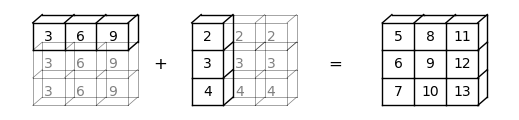

While broadcasting is very useful, it can sometimes seem confusing. For example, let’s try adding `a -> (3, 2)` and `b -> (3,)`.

In [69]:
# 오류가 나야하는 코드입니다.
a = np.array(
      [[1, 2],
       [4, 5],
       [7, 8]])
b = np.array([3, 6, 9])

a + b

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

The `ValueError` tells us that operands could not be broadcast together. Here is a visual representation to show why this broadcasting cannot be executed:

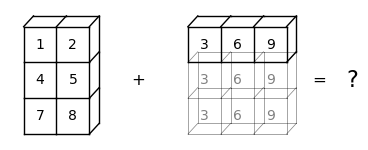

We can see that NumPy cannot expand the arrays to the same size. It is because, when `b` is expanded from `b -> (3,)` to `b -> (3, 3)`, NumPy cannot match `b` with `a -> (3, 2)`. Things get even trickier when we move to higher dimensions. To help us, we can use the following list of rules:

Step 1: When the dimensions of two arrays do not match, NumPy will expand the one with fewer dimensions by adding dimension(s) on the left of the existing dimensions.
- For example, if `a -> (3, 3)` and `b -> (3,)`, then broadcasting will add a dimension to the left so that `b -> (1, 3)`;
- If `a -> (2, 2, 2)` and `b -> (2, 2)`, then broadcasting will add a dimension to the left so that `b -> (1, 2, 2)`;
- If `a -> (3, 2, 2)` and `b -> (2,)`, then broadcasting will add two dimensions to the left so that `b -> (1, 1, 2)` (you can also see this process as going through Step 1 twice).

Step 2: When the two arrays have the same dimension but different shapes, NumPy will try to expand dimensions where the shape index is 1.
- For example, if `a -> (1, 3)` and `b -> (3, 1)`, then broadcasting will expand dimensions with shape 1 in both `a` and `b` so that `a -> (3, 3)` and `b -> (3, 3)`;
- If `a -> (2, 2, 2)` and `b -> (1, 2, 2)`, then broadcasting will expand the first dimension of b so that `b -> (2, 2, 2)`;
- If `a -> (3, 2, 2)` and `b -> (1, 1, 2)`, then broadcasting will expand `b` on all dimensions with shape 1 so that `b -> (3, 2, 2)`.

Here are code examples for broadcasting higher dimensional arrays

In [70]:
# a -> (2, 2, 2) and  b -> (1, 2, 2)

a = np.array(
    [[[1, 2],
      [2, 3]],

     [[2, 3],
      [3, 4]]])
print(f'the shape of array a is {a.shape}')

b = np.array(
    [[1,7],
     [7,1]])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (2, 2, 2)
the shape of array b is (2, 2)


array([[[ 2,  9],
        [ 9,  4]],

       [[ 3, 10],
        [10,  5]]])

In [71]:
# a -> (3, 2, 2) and b -> (2,)

a = np.array(
    [[[1, 2],
      [3, 4]],

     [[4, 5],
      [6, 7]],

     [[7, 8],
      [9, 10]]])
print(f'the shape of array a is {a.shape}')

b = np.array([3, 6])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (3, 2, 2)
the shape of array b is (2,)


array([[[ 4,  8],
        [ 6, 10]],

       [[ 7, 11],
        [ 9, 13]],

       [[10, 14],
        [12, 16]]])

Step 3: After Step 1 and 2, if the two arrays still do not match, a `ValueError` will be raised.
- For example, suppose `a -> (2, 2, 3)` and `b -> (2, 2)`
- By Step 1, `b` will be expanded to `b -> (1, 2, 2)`;
- By Step 2, `b` will be expanded to `b -> (2, 2, 2)`;
- We can see that they do not match each other after the first two steps. Thus, a `ValueError` will be raised

In [72]:
a = np.array(
    [[[1, 2, 3],
      [2, 3, 4]],

     [[2, 3, 4],
      [3, 4, 5]]])
print(f'the shape of array a is {a.shape}')

b = np.array(
    [[1,7],
     [7,1]])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (2, 2, 3)
the shape of array b is (2, 2)


ValueError: operands could not be broadcast together with shapes (2,2,3) (2,2) 

### Mutability and Copying Arrays

NumPy arrays are mutable data types, like Python lists. In other words, their **contents can be altered (mutated) in memory after initialization**. We already saw examples above.

Here’s another example:

In [73]:
a = np.array([42, 44])
a

array([42, 44])

In [74]:
a[-1] = 0  # Change last element to 0
a

array([42,  0])

Mutability leads to the following behavior (which can be shocking to MATLAB programmers…)

In [75]:
a = np.random.randn(3)
a

array([ 0.73856172, -0.87168238, -0.64271604])

In [76]:
b = a
b[0] = 0.0
a

array([ 0.        , -0.87168238, -0.64271604])

What’s happened is that we have changed `a` by changing `b`. The name `b` is bound to a and becomes just another reference to the array. Hence, it has equal rights to make changes to that array. This is in fact the most sensible default behavior! It means that **we pass around only pointers to data, rather than making copies**. **Making copies** is **expensive in terms of both speed and memory**.

#### Making Copies

It is of course possible to make `b` an independent copy of `a` when required. This can be done using `np.copy`.

In [77]:
a = np.random.randn(3)
a

array([ 0.17013533, -1.73769834, -0.09775539])

In [78]:
b = np.copy(a)
b

array([ 0.17013533, -1.73769834, -0.09775539])

Now `b` is an independent copy (called a **deep copy**)

In [79]:
b[:] = 1
b

array([1., 1., 1.])

In [80]:
a

array([ 0.17013533, -1.73769834, -0.09775539])

Note that the change to `b` has not affected `a`.

### Additional Functionality

Let’s look at some other useful things we can do with NumPy.

#### 1.6.1. Vectorized Functions

NumPy provides versions of the standard functions `log`, `exp`, `sin`, etc. that **act element-wise** on arrays

In [81]:
z = np.array([1, 2, 3])
np.sin(z)

array([0.84147098, 0.90929743, 0.14112001])

This eliminates the need for explicit element-by-element loops such as

```python
n = len(z)
y = np.empty(n)
for i in range(n):
    y[i] = np.sin(z[i])
```

Because they act element-wise on arrays, these functions are called **vectorized functions**. In NumPy-speak, they are also called **ufuncs**, which stands for “**universal functions**”. As we saw above, the usual arithmetic operations (`+`, `*`, etc.) also work element-wise, and combining these with the ufuncs gives a very large set of fast element-wise functions.

In [82]:
z

array([1, 2, 3])

In [83]:
(1 / np.sqrt(2 * np.pi)) * np.exp(- 0.5 * z**2)

array([0.24197072, 0.05399097, 0.00443185])

Not all user-defined functions will act element-wise. For example, passing the function `f` defined below a NumPy array causes a `ValueError`.

In [84]:
def f(x):
    return 1 if x > 0 else 0

In [85]:
f(z)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

The NumPy function `np.where` provides a vectorized alternative:

In [86]:
x = np.random.randn(4)
x

array([ 1.64553003, -0.01153994,  1.19767003,  0.93263559])

In [87]:
np.where(x > 0, 1, 0)  # Insert 1 if x > 0 true, otherwise 0

array([1, 0, 1, 1])

You can also use `np.vectorize` to vectorize a given function

In [88]:
f = np.vectorize(f)
f(x)                # Passing the same vector x as in the previous example

array([1, 0, 1, 1])

However, this approach doesn’t always obtain the same speed as a more carefully crafted vectorized function.

#### Comparisons

As a rule, **comparisons** on arrays are done **element-wise**.

In [89]:
z = np.array([2, 3])
y = np.array([2, 3])
z == y

array([ True,  True])

In [90]:
y[0] = 5
z == y

array([False,  True])

In [91]:
z != y

array([ True, False])

The situation is similar for `>`, `<`, `>=` and `<=`. We can also do comparisons against scalars

In [92]:
z = np.linspace(0, 10, 5)
z

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [93]:
z > 3

array([False, False,  True,  True,  True])

This is particularly **useful for conditional extraction**.

In [94]:
b = z > 3
b

array([False, False,  True,  True,  True])

In [95]:
z[b]

array([ 5. ,  7.5, 10. ])

Of course we can—and frequently do—perform this in one step

In [96]:
z[z > 3]

array([ 5. ,  7.5, 10. ])

#### Sub-packages

NumPy provides some additional functionality related to scientific programming through its sub-packages. We’ve already seen how we can generate random variables using `np.random`

In [97]:
z = np.random.randn(10000)  # Generate standard normals
y = np.random.binomial(10, 0.5, size=1000)    # 1,000 draws from Bin(10, 0.5)
y.mean()

5.033

Another commonly used subpackage is `np.linalg`

In [98]:
A = np.array([[1, 2], [3, 4]])

np.linalg.det(A)           # Compute the determinant

-2.0000000000000004

In [99]:
np.linalg.inv(A)           # Compute the inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Much of this functionality is also available in **SciPy**, a collection of modules that are built on top of NumPy. 

Let’s revisit a bond pricing example we saw in Control flow. Recall that the equation for pricing a bond with coupon payment $C$, face value $M$, yield to maturity $i$, and periods to maturity $N$ is

$$ P = \left( \sum\limits^{N}_{n=1} \frac{C}{(1+i)^N} \right) +  \frac{M}{(1+i)^N} = C \left( \frac{1 - (1+i)^{-N}}{i} \right) + M (1+i)^{-N} $$

In the code cell below, we have defined variables for `i`, `M` and `C`. You have two tasks:
- Define a numpy array `N` that contains all maturities between 1 and 10 (Hint : look at the np.arange function.)
- Using the equation above, determine the bond prices of all maturity levels in your array.

In [100]:
i = 0.03
M = 100
C = 5

# Define array here

# price bonds here

## Matplotlib and Visualization

Matplotlib is an outstanding graphics library, designed for scientific computing, with
- high-quality 2D and 3D plots
- output in all the usual formats (PDF, PNG, etc.)
- LaTeX integration
- fine-grained control over all aspects of presentation
- animation, etc.

### Matplotlib's Split Personality

Matplotlib is unusual in that it offers two different interfaces to plotting.
- One is a simple **MATLAB-style API** (Application Programming Interface) that was written to help MATLAB refugees find a ready home.
- The other is a more **“Pythonic” object-oriented API**.

For reasons described below, we recommend that you use the second API.
But first, let’s discuss the difference.

### The APIs

#### The MATLAB-style API

Here’s the kind of easy example you might find in introductory treatments

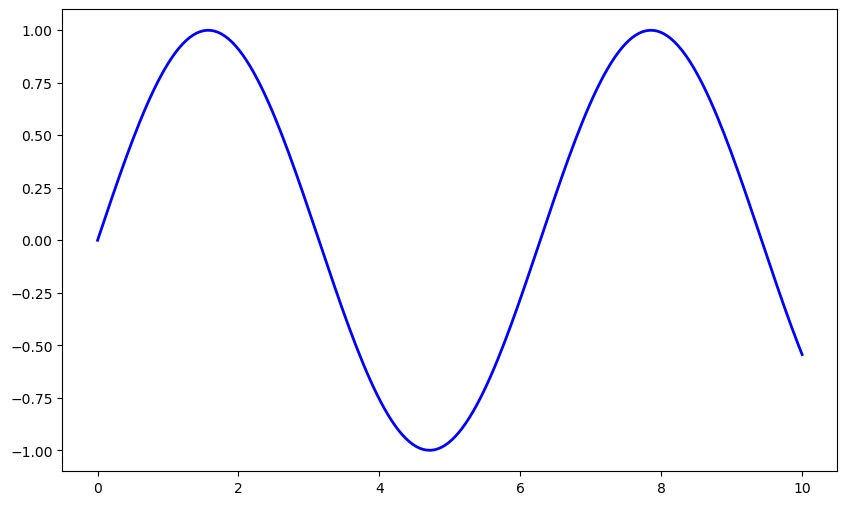

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

This is simple and convenient, but also somewhat limited and un-Pythonic. For example, in the function calls, a lot of objects get created and passed around without making themselves known to the programmer. Python programmers tend to prefer a more explicit style of programming (run import this in a code block and look at the second line). This leads us to the alternative, object-oriented Matplotlib API.

#### The Object-Oriented API

Here’s the code corresponding to the preceding figure using the object-oriented API

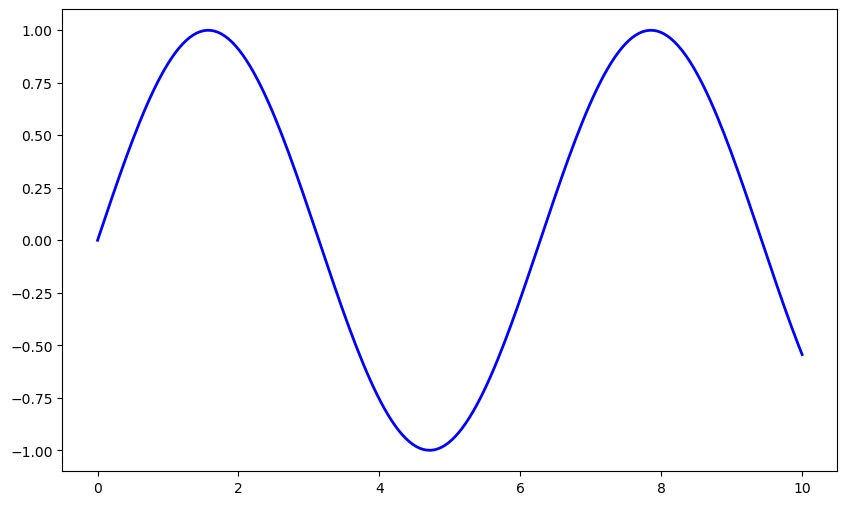

In [102]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

Here the call `fig, ax = plt.subplots()` returns a pair, where
- `fig` is a `Figure` instance—like a blank canvas.
- `ax` is an `AxesSubplot` instance—think of a frame for plotting in.

The `plot()` function is actually a method of `ax`. While there’s a bit more typing, the more explicit use of objects gives us better control. This will become more clear as we go along.

#### Tweaks

Here we’ve changed the line to red and added a legend

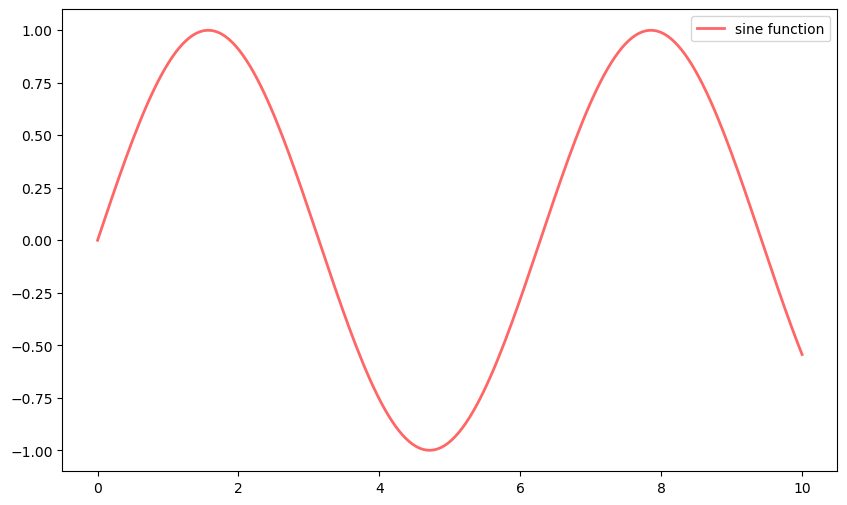

In [103]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

We’ve also used `alpha` to make the line slightly **transparent**—which makes it look smoother. The location of the legend can be changed by replacing `ax.legend()` with `ax.legend(loc='upper center')`.

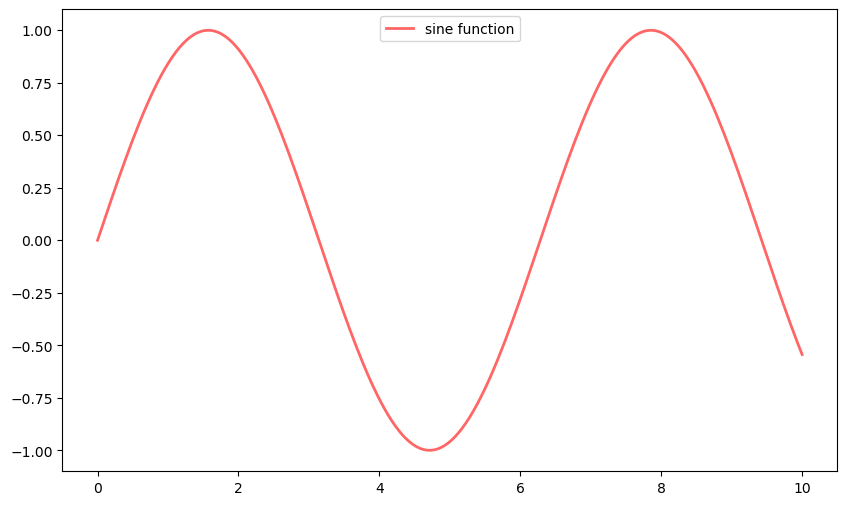

In [104]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

If everything is properly configured, then adding LaTeX is trivial

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_21894/4205971063.py:2: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)


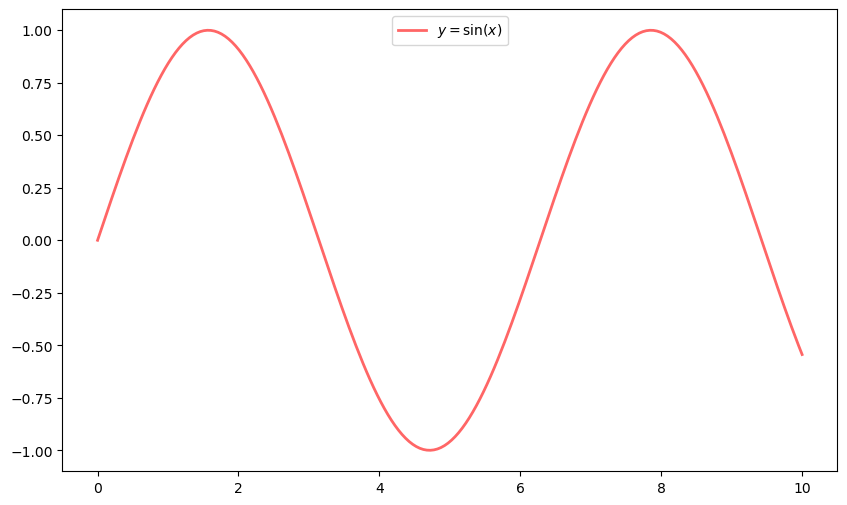

In [105]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

Controlling the ticks, adding titles and so on is also straightforward

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_21894/3106301064.py:2: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)


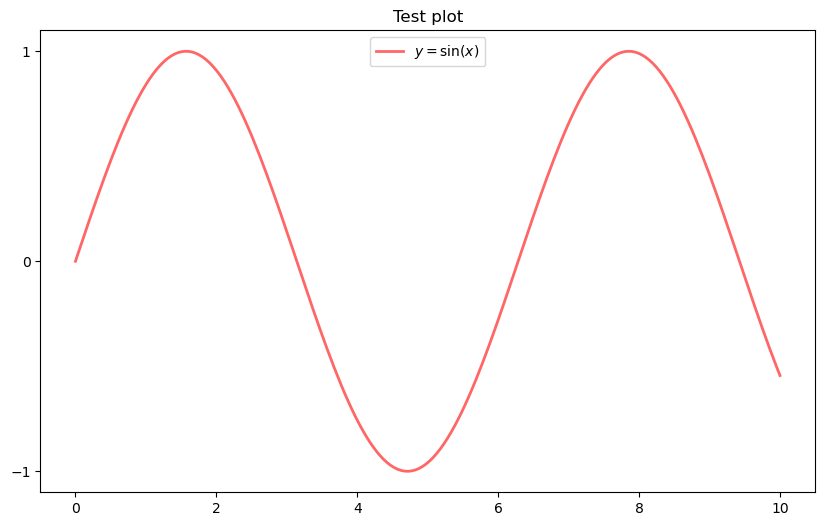

In [106]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

### More Features

Matplotlib has a huge array of functions and features, which you can discover over time as you have need for them. We mention just a few.

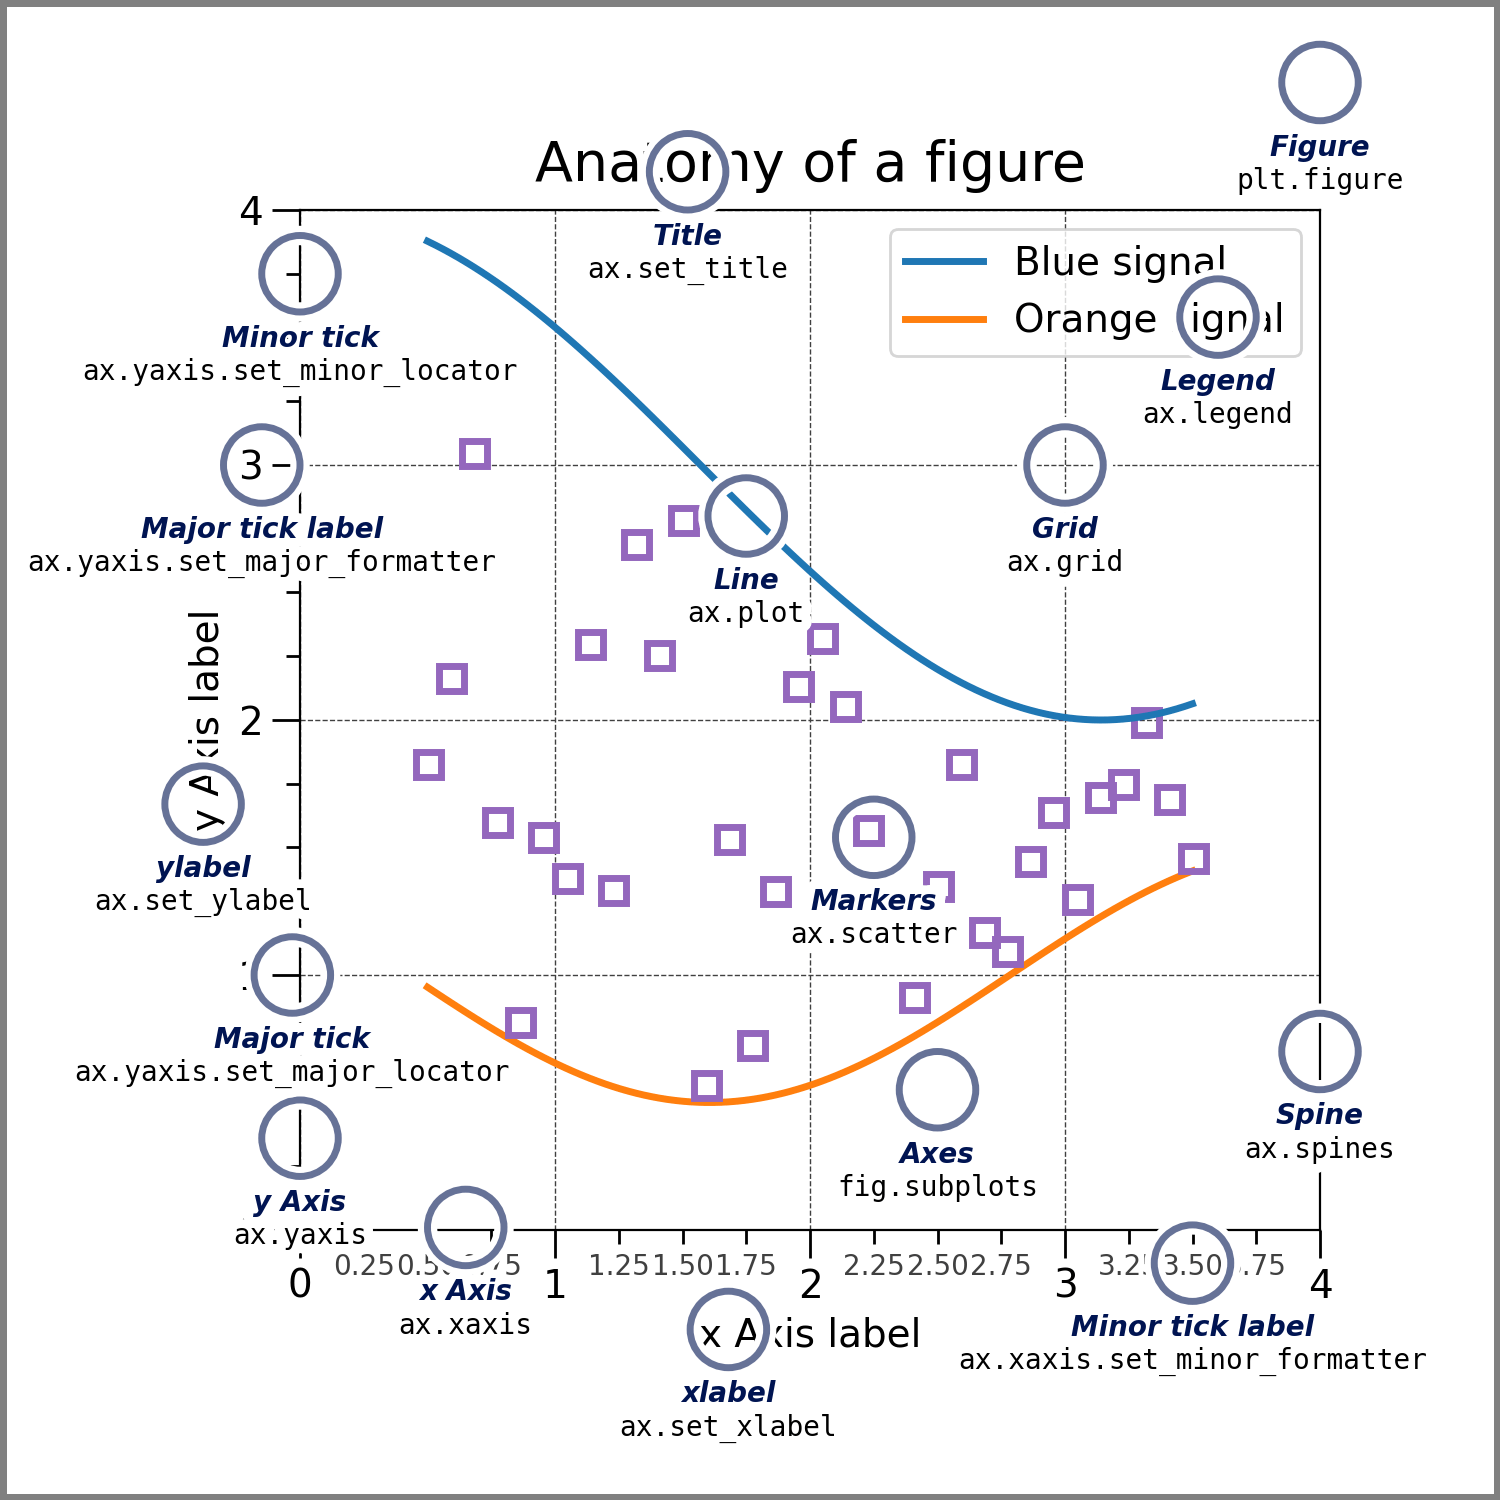

#### Multiple Plots on One Axis

It’s straightforward to generate multiple plots on the same axes. Here’s an example that randomly generates three normal densities and adds a label with their mean.

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_21894/3917968170.py:9: SyntaxWarning: invalid escape sequence '\m'
  current_label = f'$\mu = {m:.2}$'


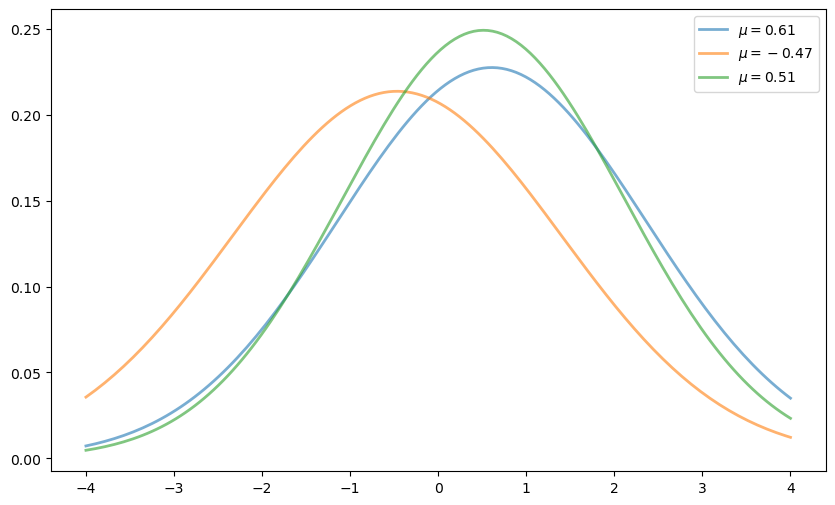

In [107]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

#### Multiple Subplots

Sometimes we want multiple subplots in one figure. Here’s an example that generates 6 histograms

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\q'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\q'
/var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_21894/3935544571.py:8: SyntaxWarning: invalid escape sequence '\m'
  t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
/var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_21894/3935544571.py:8: SyntaxWarning: invalid escape sequence '\q'
  t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'


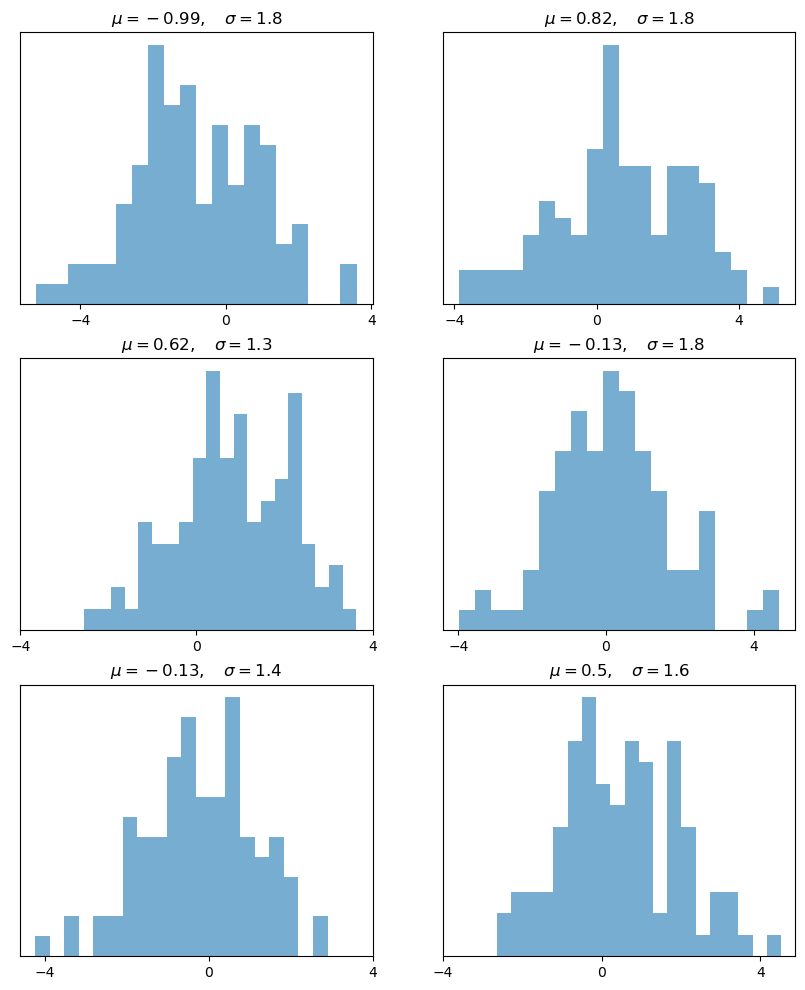

In [108]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

#### 3D Plots

Matplotlib does a nice job of 3D plots — here is one example

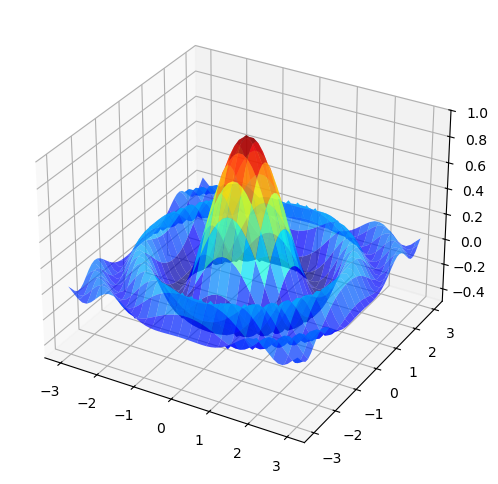

In [109]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

#### A Customizing Function

Perhaps you will find a set of customizations that you regularly use. Suppose we usually prefer our axes to go through the origin, and to have a grid. Here’s a nice example from Matthew Doty of how the object-oriented API can be used to build a custom `subplots` function that implements these changes. Read carefully through the code and see if you can follow what’s going on

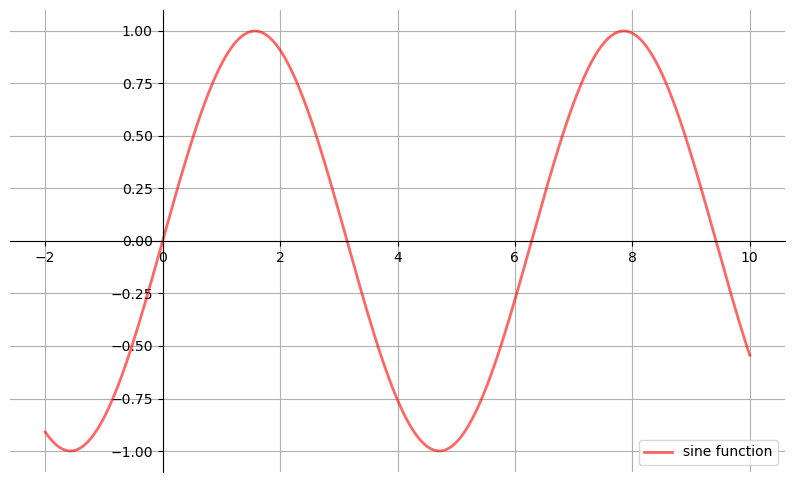

In [110]:
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

The custom `subplots` function
1. calls the standard `plt.subplots` function internally to generate the `fig`, `ax` pair,
2. makes the desired customizations to `ax`, and
3. passes the `fig`, `ax` pair back to the calling code.

#### Style Sheets

Another useful feature in Matplotlib is [style sheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). We can use style sheets to create plots with uniform styles. We can find a list of available styles by printing the attribute `plt.style.available`.

In [111]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


We can now use the `plt.style.use()` method to set the style sheet. Let’s write a function that takes the name of a style sheet and draws different plots with the style

In [112]:
def draw_graphs(style='default'):

    # Setting a style sheet
    plt.style.use(style)

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    x = np.linspace(-13, 13, 150)

    # Set seed values to replicate results of random draws
    np.random.seed(9)

    for i in range(3):

        # Draw mean and standard deviation from uniform distributions
        m, s = np.random.uniform(-8, 8), np.random.uniform(2, 2.5)

        # Generate a normal density plot
        y = norm.pdf(x, loc=m, scale=s)
        axes[0].plot(x, y, linewidth=3, alpha=0.7)

        # Create a scatter plot with random X and Y values
        # from normal distributions
        rnormX = norm.rvs(loc=m, scale=s, size=150)
        rnormY = norm.rvs(loc=m, scale=s, size=150)
        axes[1].plot(rnormX, rnormY, ls='none', marker='o', alpha=0.7)

        # Create a histogram with random X values
        axes[2].hist(rnormX, alpha=0.7)

        # and a line graph with random Y values
        axes[3].plot(x, rnormY, linewidth=2, alpha=0.7)

    plt.suptitle(f'Style: {style}', fontsize=13)
    plt.show()

Let’s see what some of the styles look like. First, we draw graphs with the style sheet `seaborn`.

In [115]:
draw_graphs(style='seaborn')

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

We can use `grayscale` to remove colors in plots

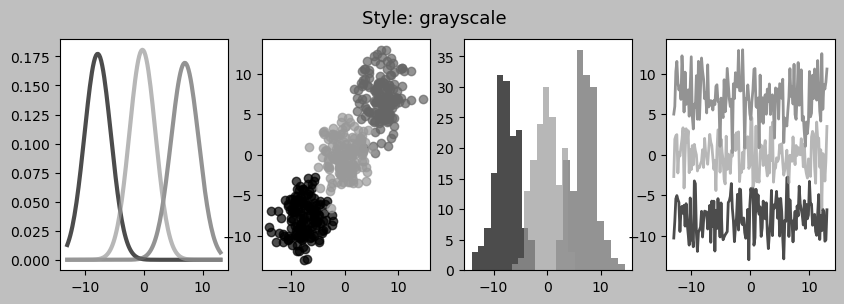

In [116]:
draw_graphs(style='grayscale')

Here is what `ggplot` looks like

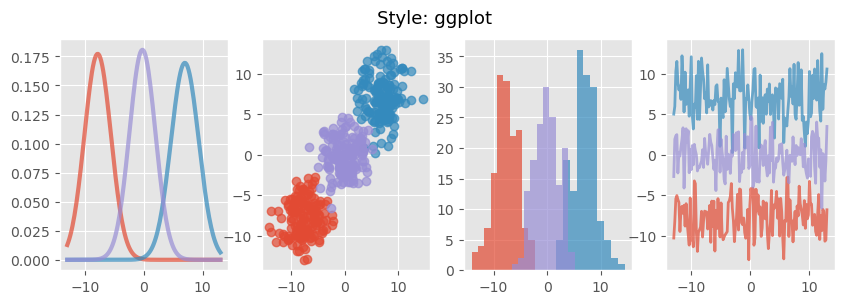

In [117]:
draw_graphs(style='ggplot')

We can also use the style `dark_background`

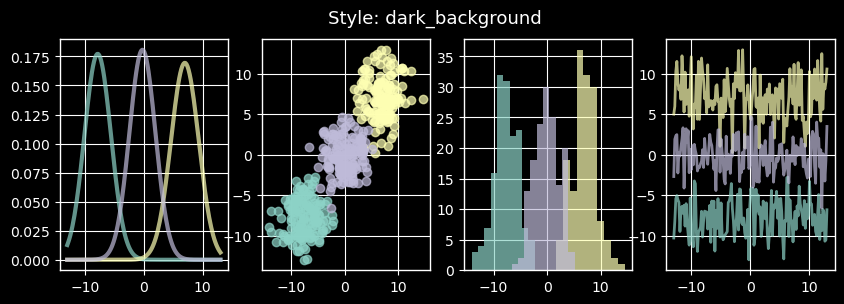

In [118]:
draw_graphs(style='dark_background')

You can use the function to experiment with other styles in the list. If you are interested, you can even create your own style sheets. Parameters for your style sheets are stored in a dictionary-like variable `plt.rcParams`.

In [119]:
print(plt.rcParams.keys())

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': 'black',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both

There are many parameters you could set for your style sheets. Set parameters for your style sheet by:
1. creating your own `matplotlibrc` file, or
2. updating values stored in the dictionary-like variable `plt.rcParams`

Let’s change the style of our overlaid density lines using the second method

In [120]:
from cycler import cycler

# set to the default style sheet
plt.style.use('default')

# You can update single values using keys:

# Set the font style to italic
plt.rcParams['font.style'] = 'italic'

# Update linewidth
plt.rcParams['lines.linewidth'] = 2


# You can also update many values at once using the update() method:

parameters = {

    # Change default figure size
    'figure.figsize': (5, 4),

    # Add horizontal grid lines
    'axes.grid': True,
    'axes.grid.axis': 'y',

    # Update colors for density lines
    'axes.prop_cycle': cycler('color',
                            ['dimgray', 'slategrey', 'darkgray'])
}

plt.rcParams.update(parameters)

In [121]:
cycler?

Signature: cycler(*args, **kwargs)
Docstring:
Create a new `Cycler` object from a single positional argument,
a pair of positional arguments, or the combination of keyword arguments.

cycler(arg)
cycler(label1=itr1[, label2=iter2[, ...]])
cycler(label, itr)

Form 1 simply copies a given `Cycler` object.

Form 2 composes a `Cycler` as an inner product of the
pairs of keyword arguments. In other words, all of the
iterables are cycled simultaneously, as if through zip().

Form 3 creates a `Cycler` from a label and an iterable.
This is useful for when the label cannot be a keyword argument
(e.g., an integer or a name that has a space in it).

Parameters
----------
arg : Cycler
    Copy constructor for Cycler (does a shallow copy of iterables).
label : name
    The property key. In the 2-arg form of the function,
    the label can be any hashable object. In the keyword argument
    form of the function, it must be a valid python identifier.
itr : iterable
    Finite length iterable of the p

> These settings are `global`.
> Any plot generated after changing parameters in `.rcParams` will be affected by the setting.

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_21894/350508629.py:6: SyntaxWarning: invalid escape sequence '\m'
  current_label = f'$\mu = {m:.2}$'


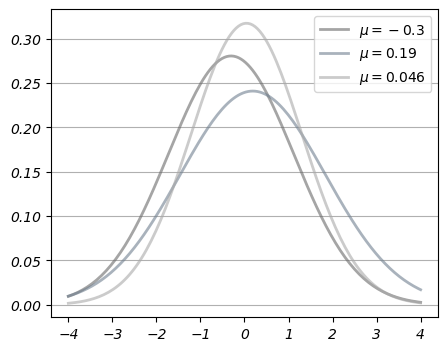

In [122]:
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

Apply the `default` style sheet again to change your style back to default

In [123]:
plt.style.use('default')

# Reset default figure size
plt.rcParams['figure.figsize'] = (10, 6)

Here are more [examples](https://www.datafantic.com/the-magic-of-matplotlib-stylesheets/) on how to change these parameters.

Let's practice. Plot the function

$$f(x) = \cos(\pi \theta x) \exp(-x)$$

over the interval $[0,5]$ for each $\theta$ in `np.linspace(0, 2, 10)`. Place all the curves in the same figure. The output should look like this:

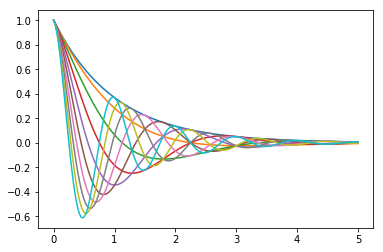

## SciPy

SciPy builds on top of NumPy to provide common tools for scientific programming such as
- linear algebra
- numerical integration
- interpolation
- optimization
- distributions and random number generation
- signal processing
- etc.

Like NumPy, SciPy is stable, mature and widely used. Many SciPy routines are thin wrappers around industry-standard Fortran libraries such as LAPACK, BLAS, etc. It’s not really necessary to “learn” SciPy as a whole. A more common approach is to get some idea of what’s in the library and then look up documentation as required.

In this section, we aim only to highlight some useful parts of the package.

In [143]:
import scipy

### SciPy vs. NumPy

SciPy is a package that contains various tools that are built on top of NumPy, using its array data type and related functionality. In fact, when we import SciPy we also get NumPy, as can be seen from this excerpt the SciPy initialization file:

In [135]:
# Import numpy symbols to scipy namespace
from numpy import *
from numpy.random import rand, randn
from numpy.fft import fft, ifft
from numpy.lib.scimath import *

However, it’s more common and better practice to use NumPy functionality explicitly.

In [136]:
import numpy as np

a = np.identity(3)

What is useful in SciPy is the functionality in its sub-packages `scipy.optimize`, `scipy.integrate`, `scipy.stats`, etc.

Let’s explore some of the major sub-packages.

### Statistics

The `scipy.stats` subpackage supplies

- numerous random variable objects (densities, cumulative distributions, random sampling, etc.)
- some estimation procedures
- some statistical tests

#### Random Variables and Distributions

Recall that `numpy.random` provides functions for generating random variables

In [137]:
np.random.beta(5, 5, size=3)

array([0.58958806, 0.25079721, 0.48304167])

This generates a draw from the distribution with the density function below when `a, b = 5, 5`: $$f(x; a, b) = \frac{x^{a-1}(1-x)^{b-1}}{\int^1_0 u^{a-1}(1-u)^{b-1}du}$$

Sometimes we need access to the density itself, or the cdf, the quantiles, etc. For this, we can use `scipy.stats`, which provides all of this functionality as well as random number generation in a single consistent interface.

Here’s an example of usage

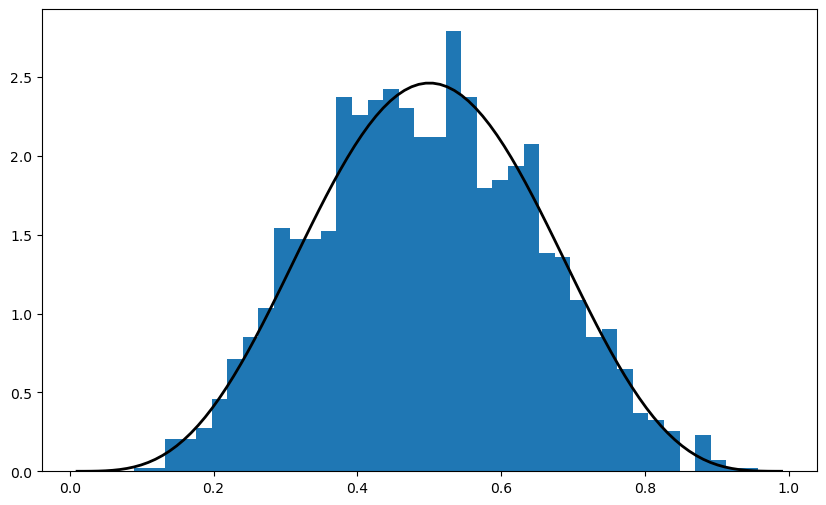

In [138]:
from scipy.stats import beta
import matplotlib.pyplot as plt

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

The object `q` that represents the distribution has additional useful methods, including

In [139]:
q.cdf(0.4)      # Cumulative distribution function

0.26656768000000003

In [140]:
q.ppf(0.8)      # Quantile (inverse cdf) function

0.6339134834642708

In [141]:
q.mean()

0.5

The alternative code that generates the figure above can be replaced by

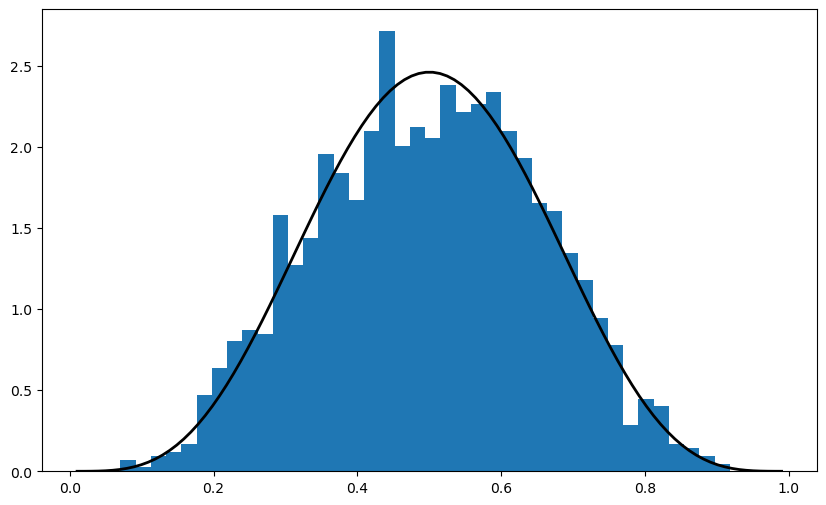

In [145]:
obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()

There are a variety of statistical functions in `scipy.stats`. For example, `scipy.stats.linregress` implements simple linear regression.

In [146]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.9987224953665506, -0.0082119482492203)

### Roots and Fixed Points

A **root** or **zero** of a real function $f$ on $[a, b]$ is an $x \in [a, b]$ such that $f(x) = 0$.

For example, if we plot the function $$f(x) = \sin(4(s-1/4)) + x + x^{20} - 1$$ with $x \in [0, 1]$ we get

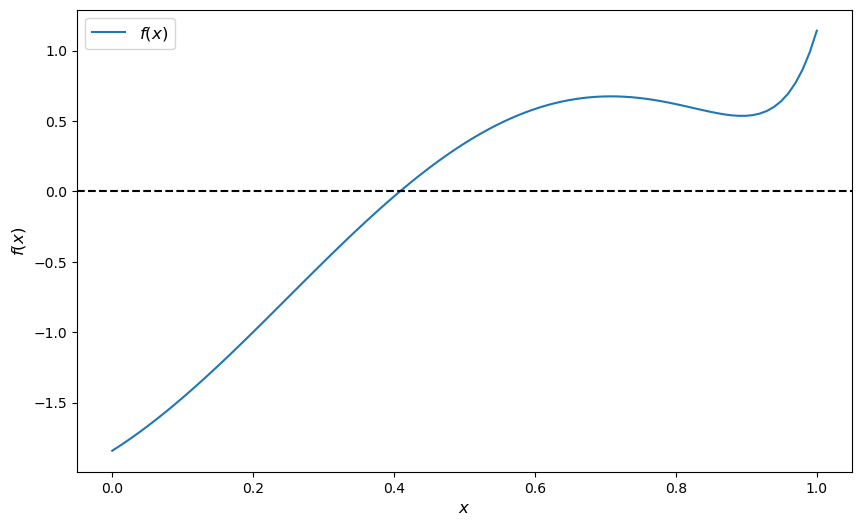

In [147]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='$f(x)$')
ax.axhline(ls='--', c='k')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

The unique root is approximately 0.408. Let’s consider some numerical techniques for finding roots.

#### Bisection

One of the most common algorithms for numerical root-finding is bisection.

To understand the idea, recall the well-known game where

- Player A thinks of a secret number between 1 and 100
- Player B asks if it’s less than 50
    - If yes, B asks if it’s less than 25
    - If no, B asks if it’s less than 75

And so on. This is **bisection**.

Here’s a simplistic implementation of the algorithm in Python. It works for all sufficiently well behaved increasing continuous functions with $f(a) < 0 < f(b)$

In [148]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:   # root is between lower and middle
            lower, upper = lower, middle
        else:               # root is between middle and upper
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

In [149]:
bisect(f, 0, 1)

0.408294677734375

Not surprisingly, SciPy provides its own bisection function.

Let’s test it using the same function above.

In [150]:
from scipy.optimize import bisect

bisect(f, 0, 1)

0.4082935042806639

https://python-programming.quantecon.org/scipy.html

## JAX and High-Performance Computing

### Installation

You should have installed `jax`. If not, please now do so by executing the command:

```python
pip install jaxlib jax
```

or use Google Colab.

### Why and when should you use JAX?

It is good to use JAX if your project requires any of 
- Python is your primary languqge;
- Just-In-Time (JIT) compilation for fast computation;
- Automatic differentiation;
- Vectorization;
- Multiple GPU/TPU acceleration, etc.

### Easy to use

JAX is like a sum of multiple friendly libraries in Python. That is, JAX = numpy + scipy + essential functionalities (e.g., auto-diff, JIT, and parallelization). If you use `numpy` then you should have no problem to use `jax`.

<center>

|NumPy|JAX|
|--|--|
|`import numpy as np`|`import jax.numpy as jnp`|
|`np.array()`|`jnp.array()`|
|`np.zeros()`|`jnp.zeros()`|
|`np.ones()`|`jnp.ones()`|
|`np.eye()`|`jnp.eye()`|
|`np.sin()`|`jnp.sin()`|
|`np.linalg`|`jnp.linalg`|

</center>

### Galleries: Some Motivating Examples

#### Auto-Differentiation

In [124]:
import jax
import jax.numpy as jnp

def f(x):
    return x * jnp.sin(x) + jnp.cos(x)

grad_of_f = jax.grad(f) # jax.grad returns a function
grad_of_f(1.)

Array(0.5403023, dtype=float32, weak_type=True)

You say you can compute the gradient by hand? How about something deep ...

In [125]:
def something_deep(x):
    for i in range(100):
        x = f(x)
    return x

grad_of_deep = jax.grad(something_deep)
grad_of_deep(1.)

Array(0., dtype=float32, weak_type=True)

#### JIT Speed Up

In [126]:
import numpy as np

def softmax_np(x):
    """
    Softmax in NumPy
    """
    z = np.exp(x)
    return z / np.sum(z, axis=0)

@jax.jit
def softmax_jax(x):
    """
    Softmax in JAX
    """
    z = jnp.exp(x)
    return z / jnp.sum(z, axis=0)

In [127]:
x = np.ones((10, 1000))
%timeit softmax_np(x)

22 μs ± 974 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [128]:
x = jnp.ones((10, 1000))
%timeit softmax_jax(x).block_until_ready()

22.5 μs ± 326 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Initialization

In [129]:
import numpy as np
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt

JAX by default uses `float32` for the best compatibility with GPUs. You need to manually do the following to enable `float64` globally.

In [130]:
jax.config.update('jax_enable_x64', True)

In [131]:
jax.devices()

[CpuDevice(id=0)]

### JIT in JAX

Suppose that we have a function that is giga-computational demanding.

```python
def expensive_func(x):
    # a bunch of giga-heavy computations
    # Python is slow, and NumPy too
    return ...
```

JAX can make the function above faster by compiling it into machine codes by using the JIT compilation. We trigger the **compilation** by calling `jax.jit`.

```python
import jax
jitted_func = jax.jit(expensive_func)
```

Note the return `jitted_func` is a function that has exactly the same signature as `expensive_func`. It is equivalent to put a decorator over the function definition.

```python
@jax.jit
def expensive_func(x):
    ...
    return ...
```

We begin with a simple example.

In [132]:
def func_np(x):
    return np.diff(np.diff(np.diff(np.diff(np.diff(x)))))

@jax.jit
def func_jax(x):
    return jnp.diff(jnp.diff(jnp.diff(jnp.diff(jnp.diff(x)))))

x = np.random.randn(100_000)
xj = jnp.asarray(x)

In [133]:
%timeit func_np(x)

75 μs ± 1.84 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [134]:
# Trigger JIT
# func_jax(xj)

In [ ]:
%timeit func_jax(xj).block_until_ready()

42.8 μs ± 594 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Around 2 times faster. NumPy uses OpenBLAS/MKL/BLIS... as backend. Why is it still slow? A more illustrative example which shows that the overhead of NumPy is problematic:

In [ ]:
A, B = np.eye(50), np.eye(50)

def func_np(x):
    for i in range(100):
        x = B @ x + np.linalg.solve(A, x) + np.linalg.norm(x)
    return x

In [ ]:
# JAX version of the code above
Aj, Bj = jnp.eye(50), jnp.eye(50)

@jax.jit
def func_jax(x):
    def scan_body(carry, _):
        x = carry
        return Bj @ x + jnp.linalg.solve(Aj, x) + jnp.linalg.norm(x), _
    return jax.lax.scan(scan_body, x, jnp.arange(100))[-1]

In [ ]:
%timeit func_np(np.ones((50, )))

1.59 ms ± 40.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
# Trigger JIT
# func_jax(jnp.ones((50, )))

%timeit func_jax(jnp.ones((50, ))).block_until_ready()

23 μs ± 334 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### What happened inside JIT?

1. When Python executes `func_jax` for the first time, the function `jax.jit` traces and traverses all the operations inside the function `func_jax`.
2. Then JIT compiles these operations into the accelerated linear algebra (XLA) codes. Imagine this as that of compiling C codes to an executable file. No numerical operations are done!
3. Then, by the next time you call the jitted `func_jax`, Python will execute the compiled XLA codes to carry out the numerical computations.
4. After the numerical computations are done in the machine level, the results are sent back to Python.

JAX basically uses Python as a **metaprogramming language** that specifies how to build an XLA program (quote by [Patrck Kidger](https://kidger.site/thoughts/jax-vs-julia/))

#### When and Where to JIT?

Usually, we JIT
- the part that has the largest scope, so that the compiler can understand your program better,
- or the function(s) that are called repetitively, for instance, the objective function in optimization:
```python
@jax.jit
def objective_func(params):
    ...
    return ...
```

Remember, when we write the JAX code, we are describing a computation flow.

#### Will these work?

Note that the following example do not work. Guess why.

In [ ]:
@jax.jit
def my_func(x):
    return np.exp(x)

my_func(jnp.ones((2, )))

TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on traced array with shape float64[2]
The error occurred while tracing the function my_func at /var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_1159/153899635.py:1 for jit. This concrete value was not available in Python because it depends on the value of the argument x.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

Below does not work in some early JAX versions; now, they do!

In [ ]:
@jax.jit
def my_func(x):
    return x + np.array([1., 2.])

print(my_func(jnp.ones((2, ))))
print(my_func(np.ones(2, )))

[2. 3.]
[2. 3.]


In [ ]:
class MyClass:

    def __init__(self):
        self.y = jnp.array(1.)

    @jax.jit
    def my_method(self, x):
        return x + self.y

Notice that the following does not work.

In [ ]:
obj = MyClass()
obj.my_method(jnp.array(2.))

TypeError: Error interpreting argument to <function MyClass.my_method at 0x11b1e1300> as an abstract array. The problematic value is of type <class '__main__.MyClass'> and was passed to the function at path self.
This typically means that a jit-wrapped function was called with a non-array argument, and this argument was not marked as static using the static_argnums or static_argnames parameters of jax.jit.

We can force it to work by adding a `static argnums` option. This assumes that `self` is static, i.e., immutable.

In [ ]:
from functools import partial

In [ ]:
class MyClass:
    
    def __init__(self):
        self.y = jnp.array(1.)

    @partial(jax.jit, static_argnums=(0, ))
    def my_method(self, x):
        return x + self.y

In [ ]:
obj = MyClass()
obj.my_method(jnp.array(2.))

Array(3., dtype=float64, weak_type=True)

Similarly, this will not (immediately) work either:

```python
@jax.jit
def f(x, g: Callable):
    return x + g(x)
```

We have to make it clear that the argument `g` is static:

```python
@partial(jax.jit, static_argnums=(1, ))
def f(x, g: Callable):
    return x + g(x)
```

A more concise way is to put `g` in an outer scope.

```python
g = ... # definition of g from outer scope

@jax.jit
def f(x):
    return x + g(x)
```

Note that whenever the static argument changes, it will trigger the JIT compilation again to create another XLA code. JAX accepts immutable objects, while Python Class is mutable. For instance,

In [ ]:
x = jnp.ones((2, ))
x[0] = 1. # This does not work.

TypeError: JAX arrays are immutable and do not support in-place item assignment. Instead of x[idx] = y, use x = x.at[idx].set(y) or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

Well, so far, doesn't JAX suck if we cannot even assign or update values to variables? No, this in my opinion a feature not a problem. Immutable objects are best for computations. For projects that need mutable objects, we can rewrite then into that of based on immutable ones.

### Randomness

#### Generating Random Numbers

Generating random numbers in JAX needs the programmer to be conscious, not drunk. This is going to look painful in the beginning. But in the end we will see this is super helpful in controlling the randomness flow. 

Think about how to generate random samples in NumPy, for example, 

```python
np.random.seed(100)
samples1 = np.random.randn(5)
samples2 = np.random.uniform(5)
samples3 = np.random.gamma(5)
```

The results are reproducible under a fixed random seed.

Then analogously, can we do the following?

```python
jnp.random.seed(100)
```

No, we have to manually play with random keys by yourself, like in C, C++, or Rust.

In [ ]:
# The equivalence to the NumPy code

key = jax.random.PRNGKey(100)
samples1 = jax.random.normal(key, shape=(5, ))

key, _ = jax.random.split(key)
samples2 = jax.random.uniform(key, shape=(5, ))

key, _ = jax.random.split(key)
samples3 = jax.random.gamma(key, shape=(5, ), a=1.)

We may think explicitly splitting random keys is a fuss/verbose, but this is standard for asynchronous/parallel/vectorizable programs. Recall the NumPy version:
```python
np.random.seed(100)
samples1 = np.random.randn(5)
samples2 = np.random.uniform(5)
samples3 = np.random.gamma(5)
```
Why are the results reproducible? Because, (1) the random seed is fixed, and (2) the order of execution is fixed. If `samples1`, `samples2`, and `samples3` are executed in parallel, can you guarantee the results are the same? No, because you will not know the order of execution. This essentially introduces another randomness (at hardware level) that is hard to control.

In [ ]:
key = jax.random.PRNGKey(100)
print(key)

# The randomness under this splitted key is independent of the previous key.
key, subkey = jax.random.split(key)
print(key, subkey)

key, subkey = jax.random.split(key)
print(key, subkey)

keys = jax.random.split(key, num=5)
print(keys)

[  0 100]
[ 701046466 2104227382] [2213033797 2583756506]
[3549270403 1145628597] [1315821631 2840677502]
[[2733948186  829389578]
 [2279201908 4116190116]
 [1481730141 3233576484]
 [1130548228  472880600]
 [4224117979 1514228929]]


In practice, you can just ignore `subkey` which is used to track randomness:

```python
key, _ = jax.random.split(key)
```

Imagine that we have an algorithm and we would like to test it on a synthetic model for 100 **independent** Monte Carlo runs then average the results.

```python
# Example code 
num_mcs = 100
for i in range(num_mcs):
    np.random.seed(i)
    data = generate_data()
    result = my_algorithm(data)
```

The implementation above is a common mistake, as seeds 1, 2, ..., 100 are not independent. How to make the randomness in the loop independent to each other? I actually don't know how to do so in NumPy.

In JAX, it is convenient:

```python
num_mcs = 100
key = jax.random.PRNGKey(1)
for i in range(num_mcs):
    key, _ = jax.random.split(key)
    data = generate_data
    result = my_algorithm(data)
```

Let's do a simple exercise: Generate two random positive definite matrices of size 6, then add them. The NumPy-style implementation is as follows:

In [ ]:
np.random.seed(999)

rand = np.random.randn(6)
psd_matrix_1 = np.outer(rand, rand) + np.eye(6)

rand = np.random.randn(6)
psd_matrix_2 = np.outer(rand, rand) + np.eye(6)

print(np.linalg.eigh(psd_matrix_1 + psd_matrix_2)[0])

[ 2.          2.          2.          2.          4.05034118 13.36009279]


Then the JAX version of the code is as follows.

In [ ]:
key = jax.random.PRNGKey(100)
rand = jax.random.normal(key, shape=(6, ))
psd_matrix_1 = jnp.outer(rand, rand) + jnp.eye(6)

key, _ = jax.random.split(key)
rand = jax.random.normal(key, shape=(6, ))
psd_matrix_2 = jnp.outer(rand, rand) + jnp.eye(6)

print(jnp.linalg.eigh(psd_matrix_1 + psd_matrix_2)[0])

[2.         2.         2.         2.         4.43398354 8.80012971]


### Vectorization

Vectorization is one of the most helpful feature of JAX for economic modeling. The vectorization here is not the same as parallelization.

Let's begin with some example. Suppose that we have two arrays `a` and `b` of shapes `(10, 5, 3, 6)` and `(10, 3, 7, 6)`, respectively. Then how do we do `a @ b` in the way that the multiplication applies to `(5, 3) ⨉ (3, 7)` while taking other dimesions as the broadcasting dimension? Eventually, we desire an array of shape `(10, 5, 7, 6)`. How do we do it in NumPy or Matlab? (Recall `einsum`.)

In [ ]:
# Answer here.

Now let's look at another example.

In [ ]:
def func(x, y):
    """
    Arguments x and y have the same shape (2, ).
    Return a (2, 2) matrix.
    """
    z = x * y
    return np.array([[x[0] ** 2, x[0] * x[1]], [np.sin(x[1]), x[0] + x[1]]]) + np.outer(z, z)

Now if inputs `x` and `y` are of shape `(100, 2)`, how can we batch ober the first dimension and return a tensor `(100, 2, 2)`? Even more complicated, if the inputs `x` and `y` are of shapes `(100, 2)` and `(300, 2)`, respectively, how do we visit over 100 and 300 and return a tensor `(100, 300, 2, 2)`?

In [ ]:
# NumPy version
np_vectorized_func = np.vectorize(func, signature='(n), (n) -> (n, n)')
np_vectorized_func(np.ones((5,  2)), np.ones((5, 2))).shape

(5, 2, 2)

Cool! NumPy has a concise way to do the vectorization. However, please note that `np.vectorize` is merely a syntax sugar of a python loop. It is **not a vectorization on the computation level**. Now let's look at the JAX implementation.

In [ ]:
def func(x, y):
    """
    Arguments x and y are of the same shape (2, ).
    Return a (2, 2) matrix.
    """
    z = x * y
    return jnp.array([[x[0] ** 2, x[0] * x[1]], [jnp.sin(x[1]), x[0] + x[1]]]) + jnp.outer(z, z)

jax_vectorized_func = jax.vmap(func, in_axes=(0, 0))
jax_vectorized_func(jnp.ones((5, 2)), jnp.ones((5, 2))).shape

(5, 2, 2)

Let's now compare the speed.

In [ ]:
a = np.ones((10000, 2))
%timeit np_vectorized_func(a, a)

28.6 ms ± 845 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
a = jnp.asarray(a)
_ = jax_vectorized_func(a, a)
%timeit jax_vectorized_func(a, a).block_until_ready()

2.31 ms ± 8.24 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


`jax.vmap(func, in_axes) -> Callable[the same signature as func]`
- `func`: the function you want to vectorize;
- `in_axes`: a tuple/list that indicates the vectorization axes for the arguments of `func`.

Recall that our `func(x, y)` takes two `(2, )` arrays as inputs and returns a `(2, 2)` matrix.
- To vectorize for `x: (n, 2)` and `y: (n, 2)` for some `n`, use `in_axes=(0, 0)` to get `(n, ...)`.
- To vectorize for `x: (2, n)` and `y: (n, 2)` for some `n`, use `in_axes=(1, 0)` to get `(n, ...)`.
- To vectorize for `x: (n, 2)` and `y: (2, )` for some `n`, use `in_axes=(0, None)` to get `(n, ...)`.
- To vectorize for `x: (m, 2)` and `y: (n, 2)` for some `m` and `n`, use two `vmap` nested to get `(m, n, ...)`, i.e.,
```python
jax.vmap(jax.vmap(func, in_axes=(0, None)), in_axes=(None, 0))
```

#### Examples

Compute the following Monte Carlo approximation of expectation, $$\mathbb E[g(X)] \approx \frac{1}{N}\sum^N_{i=1}g\left(X^{(i)}\right),$$ where $X, X^{(1)}, X^{(2)}, \cdots \sim N(\mathbf 0, I_2)$ and $$g(X) = \begin{bmatrix} 
\exp(X_1) \exp(X_2) \\
X_1 X_2 + X_1
\end{bmatrix}$$

In [ ]:
# Solution
N = 1000
key = jax.random.PRNGKey(100)
samples = jax.random.normal(key, shape=(N, 2))

def g(X):
    X1, X2 = X
    return jnp.array([jnp.exp(X1) * jnp.exp(X2), X1 * X2 + X1])

vectorized_g = jax.vmap(g, in_axes=(0, ))
propagated_samples = vectorized_g(samples)
print(propagated_samples.shape)
mean_g = jnp.mean(propagated_samples, axis=0)
print(mean_g)

(1000, 2)
[ 2.77623283 -0.02325937]


Next, consider a Matern 3/2 covariance function $C: \mathbb R \times \mathbb R \rightarrow \mathbb R$ defined by

$$C(t, t') = \sigma^2 \left(1 + \frac{\sqrt 3 \lvert t - t' \rvert}{l}\right)\exp\left( - \frac{\sqrt 3 \lvert t - t' \rvert}{l} \right).$$

Say, now we have $T$ data points $(t_1, t_2, \cdots, t_T)$, compute the covariance matrix evaluated at the Cartesian $(t_1, t_2, \cdots, t_T) \times (t_1, t_2, \cdots, t_T)$, that is, $$C_{1:T} = \begin{bmatrix}
C(t_1, t_1) & C(t_1, t_2) & \cdots & C(t_1, t_T) \\
C(t_2, t_1) & C(t_2, t_2) & \cdots & C(t_1, t_1) \\
\vdots & \vdots & \ddots & \vdots \\
C(t_T, t_1) & C(t_T, t_2) & \cdots & C(t_T, t_T)
\end{bmatrix}$$

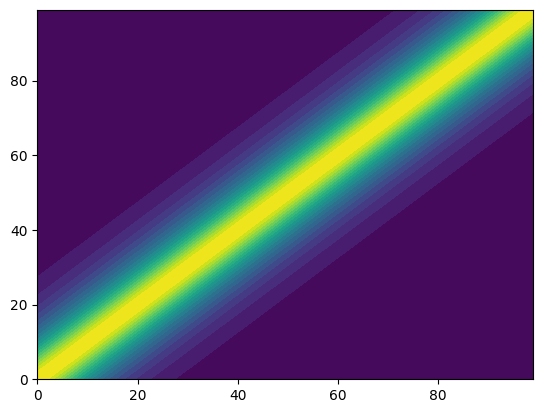

In [ ]:
# Solution

def cov_func(t1: float, t2: float, l: float, σ: float) -> float:
    return (σ ** 2) * (1 + jnp.sqrt(3) * jnp.abs(t1 - t2) / l) * (jnp.exp(-jnp.sqrt(3) * jnp.abs(t1 - t2) / l))

vectorized_cov_func = jax.vmap(jax.vmap(cov_func, in_axes=(0, None, None, None)), in_axes=(None, 0, None, None))

# Equivalently,
# @partial(jax.vmap, in_axes=(None, 0, None, None))
# @partial(jax.vmap, in_axes=(0, None, 0, 0))
# def cov_func(t1: float, t2: float, l: float, σ: float) -> float:
#     return (σ ** 2) * (1 + jnp.sqrt(3) * jnp.abs(t1 - t2) / l) * (jnp.exp(-jnp.sqrt(3) * jnp.abs(t1 - t2) / l))

ts = jnp.linspace(0.01, 1, 100)

l, σ = 0.1, 1.
cov_matrix = vectorized_cov_func(ts, ts, l, σ)

plt.contourf(cov_matrix, levels=20)

Now we compare the speed of NumPy-style and JAX-style code.

In [ ]:
# NumPy implementation 1. Naive implementation with two loops. Do not use this in practice.

def np_cov_func(t1, t2):
    cov_matrix = np.zeros((ts.size, ts.size))
    for i, t1 in enumerate(ts):
        for j, t2 in enumerate(ts):
            z = np.sqrt(3) * np.abs(t1 - t2) / l
            cov_matrix[i, j] = σ**2 * (1 + z) * np.exp(-z)
    return cov_matrix

ts_np = np.asarray(ts)
%timeit np_cov_func(ts_np, ts_np)

79 ms ± 6.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# NumPy implementation 2. Using broadcasting.
# While useful, this is applicable only for limited applications.

def np_cov_func(t1, t2):
    z = np.sqrt(3) * np.abs(t1[:, None] - t2[None, :]) / l
    return σ ** 2 * (1 + z) * np.exp(-z)

ts_np = np.asarray(ts)
%timeit np_cov_func(ts_np, ts_np)

45.8 μs ± 1.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
# NumPy implementation 3. Using SciPy `cdist`.

import scipy.spatial

def np_cov_func(t1, t2):
    r = scipy.spatial.distance.cdist(t1, t2, 'euclidean')
    z = np.sqrt(3) * r / l
    return σ ** 2 * (1 + z) * np.exp(-z)

ts_np = np.asarray(ts).reshape(-1, 1)
%timeit np_cov_func(ts_np, ts_np)

41.9 μs ± 1.65 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%timeit vectorized_cov_func(ts, ts, l, σ).block_until_ready()

1.79 ms ± 73.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
# In principle, we should not jit vmap which is jitted already, 
# but for some reasons the jitted vmap is faster than that of non-jitted in my computer.
f = jax.jit(vectorized_cov_func)
_ = f(ts, ts, l, σ)

%timeit f(ts, ts, l, σ).block_until_ready()

36.3 μs ± 503 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


There is also `jax.pmap`. This is for parallelization across different divices, for example, multiple GPUs/TPUs. See details [here](https://docs.jax.dev/en/latest/sharded-computation.html). 

### Auto-Differentiation

#### Gradient

Consider a function $f: \mathbb R^d \rightarrow \mathbb R$. JAX computes the gradient of $f$ by `grad_f = jax.grad(f)`.

We will practice by implementing examples. Let a function $f$ be defined as $$f(x) = x^\top A x.$$ Compute $\nabla f$, and compare with the true gradient $2 A x$.

In [ ]:
A = jnp.eye(2)

def f(x):
    return jnp.dot(x, A @ x)

grad_f = jax.grad(f)
grad_f(jnp.array([1., 2.]))

Array([2., 4.], dtype=float64)

Next, consider an MLE objective function $$\ell(\theta) = x^\top A^{-1}(\theta)x,$$ where $$A(\theta) = \begin{bmatrix} 2 & \text{sigmoid}(\theta) \\ \text{sigmoid}(\theta) & 3 \end{bmatrix},$$ and $x \in \mathbb R^2$ is given. Compute $\nabla \ell$ at $\theta = 2$, and compare the result to that of the finite difference.

In [ ]:
import jax.scipy

key = jax.random.PRNGKey(100)
x = jax.random.normal(key, shape=(2, ))

def sigmoid(θ):
    return 1 / (1 + jnp.exp(-θ))

def mle_objective(θ):
    A = jnp.array([[2., sigmoid(θ)], 
                   [sigmoid(θ), 3.]])
    chol = jax.scipy.linalg.cho_factor(A, lower=True)
    return jnp.dot(x, jax.scipy.linalg.cho_solve(chol, x))

grad_mle_obj = jax.grad(mle_objective)
print('[01] JAX auto-diff:', grad_mle_obj(2.))

# Compute gradient at 2. using finite difference.
print('[02] Finite diff  :', (mle_objective(2. + 1e-5) - mle_objective(2.)) / 1e-5)

[01] JAX auto-diff: 0.02155437443121922
[02] Finite diff  : 0.021554311946392343


#### Jacobian and Hessian

JAX computes Jacobian of any function $f: \mathbb R^n \rightarrow \mathbb R^m$ by `jax.jacfwd` or `jax.jacrev`. They give the same results but are implemented in different ways:
- `jax.jacfwd` uses forward-mode autodiff, while
- `jax.jacrev` uses reverse-mode autodiff.

I am no expert in autodiff, but essentially, we use `jacfwd` when $n \ll m$ while we use `jacrev` when $n \gg m$ for the best computation speed. To obtain the Hessian of a function, we could use either `jacfwd(jacrev(f))` or `jax.hessian(f)`.

For example, take the Jacobian of $\nabla f$ from the first example, where $$f(x) = x^\top A x.$$

In [ ]:
jac_of_gradf = jax.jacfwd(grad_f)

# Evaluate at x = (0.1, 0.2)
jac_of_gradf(jnp.array((0.1, 0.2)))

Array([[2., 0.],
       [0., 2.]], dtype=float64)

Next, consider a simple perceptron $$\text{NN}(x) = \text{sigmoid}(w^\top x + b).$$ Compute its gradient and Hessian with respect to the weight $w$. (*Hint.* Use a parameter `argnums` to specify positional argument(s) to differentiate with respect to.)

In [ ]:
def sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

def nn(x, weights, b):
    return sigmoid(jnp.dot(weights, x) + b)

key = jax.random.PRNGKey(100)
ws = jax.random.normal(key, shape=(10, ))

key, _ = jax.random.split(key)
xs = jax.random.normal(key, shape=(10, ))

grad_of_nn = jax.grad(nn, argnums=(1))
hessian_of_nn = jax.hessian(nn, argnums=(1))

print(grad_of_nn(xs, ws, 1.))
print(hessian_of_nn(xs, ws, 1.))

[ 1.91972490e-01 -1.03381322e-01 -2.31600852e-02 -8.93785534e-02
 -3.23622463e-01 -3.45593031e-01  2.09718645e-01  1.25725821e-05
  1.58379847e-01 -1.47384540e-01]
[[-7.72030384e-02  4.15754998e-02  9.31398529e-03  3.59441913e-02
   1.30146968e-01  1.38982581e-01 -8.43397750e-02 -5.05614916e-06
  -6.36935292e-02  5.92716921e-02]
 [ 4.15754998e-02 -2.23893026e-02 -5.01578179e-03 -1.93567216e-02
  -7.00869466e-02 -7.48451147e-02  4.54187863e-02  2.72284528e-06
   3.43003380e-02 -3.19190834e-02]
 [ 9.31398529e-03 -5.01578179e-03 -1.12366461e-03 -4.33640535e-03
  -1.57012854e-02 -1.67672379e-02  1.01749807e-02  6.09987637e-07
   7.68416123e-03 -7.15069873e-03]
 [ 3.59441913e-02 -1.93567216e-02 -4.33640535e-03 -1.67348969e-02
  -6.05938263e-02 -6.47075112e-02  3.92669132e-02  2.35404197e-06
   2.96544339e-02 -2.75957149e-02]
 [ 1.30146968e-01 -7.00869466e-02 -1.57012854e-02 -6.05938263e-02
  -2.19398531e-01 -2.34293389e-01  1.42177901e-01  8.52353088e-06
   1.07372972e-01 -9.99187488e-02]
 

#### Jacobian-Vector Product (JVP), Vector-Jacobian Product (VJP), and Hessian Vector Product (HVP)

In a plethora of applications, it is not the Jacobian or Hessian you want to solve, but the matrix-vector product $\text Jx$ for some Jacobian or Hessian $\text J$ and a vector $x$. For example, a commonly seen operator in SDE or PDE is $$(A\phi)(x) = \nabla_x\phi \cdot a(x) + \frac{1}{2}\text{tr}\left( \Gamma(x) \text H_x\phi \right),$$ and other examples include Gauss-Newton, quasi-Newton methods, and extended Kalman filters, etc. These can be solved efficiently using `jax.vjp` and `jax.jvp`. For details, see [here](https://docs.jax.dev/en/latest/notebooks/autodiff_cookbook.html#how-it-s-made-two-foundational-autodiff-functions).

### Control Flows

Does this work?

In [ ]:
def test_if(x):
    if x < 0:
        return -x
    else:
        return x

test_if(jnp.array(-1.))

Array(1., dtype=float64, weak_type=True)

Yes, it works. How about the for loop?

In [ ]:
def test_for(x):
    for i in range(5):
        x = jnp.eye(2) @ x
    return x

test_for(jnp.ones((2, )))

Array([1., 1.], dtype=float64)

Yes, it works too! It *seems* a fuss to worry about using normal Python control flows. But, if we want to use `jit` or some autodiff features, you need to be careful with control flows.

For instance, will this work?

In [ ]:
@jax.jit
def test_if(x):
    if x < 0:
        return -x
    else:
        return x
    
test_if(jnp.array(-1.))

TracerBoolConversionError: Attempted boolean conversion of traced array with shape bool[].
The error occurred while tracing the function test_if at /var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_1159/330552377.py:1 for jit. This concrete value was not available in Python because it depends on the value of the argument x.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerBoolConversionError

No, the error message explained it well already. Basically, it fails because we are building a computational graph that changes based on the **concrete** calue of a variable. We can force this example to work by using `static_argnums` argument for `jit`. But please use it only if this is intentional, that is, `x` is really static.

Recall that `jax.jit` needs to trace all the (numerical) operations to compile to XLA code. `jax.jit` cannot trace the Python control flows, such as `if else` and `for`. If the function to be jitted has a for loop, then the operations in the for loop are hardcoded to the XLA program. Why? Imagine we ask you to implement a function
```python
def my_jit(f):
    return ...
```
such that `my_jit` takes a function `f` as input and detect whether the function has a for loop. This is super difficult, and we might need to print the function `f` as string then semantically search for the `for`.

The following is a more illustrative example. Suppose that JAX can compile a Python code to a C code. How would the compiled C code of
```python
for i in range(100):
    x = f(x)
``` 
look like? We expect to get a C code like this:
```c
for (int i = 0; i < 100; i++) {
    x = f(x);
}
```
But actually, we get
```c
x = f(x);
x = f(x);
... // hardcore-repeat 100 times
```
Hence, if we desire `for` or `if` in the runtime, we need to write something that `jax` could understand and parse, that are, JAX primitives.

#### Conditional Statements and Blocks

Consider a Python *if-else* statement.
```python
if condition:
    result = true_func(x)
else:
    result = false_func(x)
```
In JAX, we write as
```python
result = jax.lax.cond(condition, true_func, false_func, operand=x)
```
Let us implement `test_if` in JAX as an example.

In [ ]:
@jax.jit
def test_if(x):
    return jax.lax.cond(x < 0.,       # condition
                        lambda _: -x, # what to execute if the condition is true
                        lambda _: x,  # what to execute if the condition is false
                        x)            # operand here can be anything because we used x from outer scope


test_if(jnp.array(-1.))

Array(1., dtype=float64, weak_type=True)

In [ ]:
@jax.jit
def test_if(x):
    return jax.lax.cond(x < 0.,
                        lambda u: -u,
                        lambda u: u, 
                        x)

test_if(jnp.array(-1.))

Array(1., dtype=float64, weak_type=True)

Let's try some simple exercise. Write ELU activation function in JAX and JIT it.

$$\text{elu}(x) = \begin{cases} e^x, & x < 0\\ 1, &x \ge 0\end{cases}$$

In [ ]:
@jax.jit
def elu(x):
    return jax.lax.cond(x < 0.,
                        lambda _: jnp.exp(x),
                        lambda _: 1.,
                        x)

# Test
elu(1.)

Array(1., dtype=float64, weak_type=True)

What if we have multiple if conditions, i.e., `if elif elif ... else`? Then use `jax.switch`. What if we have vector input? Then use `jnp.where` or `jax.vmap`.

#### Loops

|construct|jit|grad|
|----|----|----|
|`if`|❌|✅|
|`for`|✅*|✅|
|`while`|✅*|✅|
|`lax.cond`|✅|✅|
|`lax.while_loop`|✅|fwd|
|`lax.fori_loop`|✅|fwd|
|`lax.scan`|✅|✅|

\* means argument-valuable-independent loop condition - unrolls the loop. See [here](https://docs.jax.dev/en/latest/notebooks/Common_Gotchas_in_JAX.html)

Similar to the `jax.lax.cond` we have seen above, for loops, we have `jax.lax.while_loop`, `jax.lax.fori_loop`, `scan`. Consider a naive numpy implementation of summation:

```python
def my_sum(x):
    summation = 0.
    for i in range(x.shape[0]):
        summation += x[i]
    return summation
```

The JAX implementation of it is

In [ ]:
def my_sum(x):

    def body_func(i, val):
        return x[i] + val
    
    return jax.lax.fori_loop(lower=0,            # the starting index
                             upper=x.shape[0],   # the number of loops
                             body_fun=body_func, # the loop body (index, previous_val) -> val
                             init_val=0.)        # initial value of the loop val

my_sum(jnp.ones((10, )))

Array(10., dtype=float64)

The compiled function looks like this:

In [ ]:
jax.make_jaxpr(my_sum)(jnp.ones((10, )))

{ lambda ; a:f64[10]. let
    _:i64[] b:f64[] = scan[
      _split_transpose=False
      jaxpr={ lambda ; c:f64[10] d:i64[] e:f64[]. let
          f:i64[] = add d 1
          g:bool[] = lt d 0
          h:i64[] = convert_element_type[new_dtype=int64 weak_type=False] d
          i:i64[] = add h 10
          j:i64[] = select_n g d i
          k:f64[1] = dynamic_slice[slice_sizes=(1,)] c j
          l:f64[] = squeeze[dimensions=(0,)] k
          m:f64[] = convert_element_type[new_dtype=float64 weak_type=False] e
          n:f64[] = add l m
        in (f, n) }
      length=10
      linear=(False, False, False)
      num_carry=2
      num_consts=1
      reverse=False
      unroll=1
    ] a 0 0.0
  in (b,) }

Now that if we don't use the JAX language `jax.fori_loop` but simply use Python for loop, what does JAX see?

In [ ]:
# This loop is jittable indeed, but ...
def my_sum_native(x):
    summation = 0.
    for i in range(x.shape[0]):
        summation += x[i]
    return summation

jax.make_jaxpr(my_sum_native)(jnp.ones(10, ))

{ lambda ; a:f64[10]. let
    b:f64[1] = slice[limit_indices=(1,) start_indices=(0,) strides=None] a
    c:f64[] = squeeze[dimensions=(0,)] b
    d:f64[] = add 0.0 c
    e:f64[1] = slice[limit_indices=(2,) start_indices=(1,) strides=None] a
    f:f64[] = squeeze[dimensions=(0,)] e
    g:f64[] = add d f
    h:f64[1] = slice[limit_indices=(3,) start_indices=(2,) strides=None] a
    i:f64[] = squeeze[dimensions=(0,)] h
    j:f64[] = add g i
    k:f64[1] = slice[limit_indices=(4,) start_indices=(3,) strides=None] a
    l:f64[] = squeeze[dimensions=(0,)] k
    m:f64[] = add j l
    n:f64[1] = slice[limit_indices=(5,) start_indices=(4,) strides=None] a
    o:f64[] = squeeze[dimensions=(0,)] n
    p:f64[] = add m o
    q:f64[1] = slice[limit_indices=(6,) start_indices=(5,) strides=None] a
    r:f64[] = squeeze[dimensions=(0,)] q
    s:f64[] = add p r
    t:f64[1] = slice[limit_indices=(7,) start_indices=(6,) strides=None] a
    u:f64[] = squeeze[dimensions=(0,)] t
    v:f64[] = add s u
    w:

See? Again recall that JAX cannot trace the Python control flows.

Now we practice with some examples. Consider a recursion $$X_t = 0.1 X_{t-1} + U_t, \quad \forall t = 1, \cdots, T.$$ Suppose that the initial $X_0$ and inputs $\{U_t\}^{T}_{t=1}$ are known. Compute $X_T$.

In [ ]:
# Simple NumPy way of implementation
def recursion(x0, us):
    T = us.shape[0]
    x = x0
    for t in range(T):
        x = 0.1 * x + us[t]
    return x

recursion(np.array(0.1), 0.2 * np.ones((10, )))

np.float64(0.22222222221000001)

In [ ]:
# JAX way of implementation
def recursion(x0, us):

    def body_func(t, x):
        x = 0.1 * x + us[t]
        return x

    return jax.lax.fori_loop(lower=0,
                             upper=us.shape[0],
                             body_fun=body_func,
                             init_val=x0)

recursion(jnp.array(0.1), 0.2 * jnp.ones((10, )))

Array(0.22222222, dtype=float64)

Wait a sec, but the function only returns the value of $X$ at $T$. How do I keep all the history results? This is very simple in NumPy. Just introduce a result accumulator, say, `xs`.

In [ ]:
def recursion(x0, us):
    T = us.shape[0]
    xs = np.zeros((T, )) # the accumulator

    x = x0
    for t in range(T):
        x = 0.1 * x + us[t]
        xs[t] = x
    return xs

recursion(np.array(0.1), 0.2 * np.ones((10, )))

array([0.21      , 0.221     , 0.2221    , 0.22221   , 0.222221  ,
       0.2222221 , 0.22222221, 0.22222222, 0.22222222, 0.22222222])

Can I do the same in JAX?

In [ ]:
@jax.jit
def recursion(x0, us):
    xs = jnp.zeros((T, ))

    def fori_body(t, x):
        x = 0.1 * x + us[t]
        xs[t] = x
        return x
    
    return jax.lax.fori_loop(lower=0,
                             upper=us.shape[0],
                             body_fun=fori_body,
                             init_val=x0)

No. We will get an error in the line `xs[t] = x` because JAX DeviceArray are immutable (i.e., no assignment). We can, to some extent, force `xs[k] = x` to work by using "JAX array update" at the cost of making your program nasty, slow, and unreadable. The authentic way to do it is by using the `scan` operation, because $$X_{t} = 0.1 X_{t-1} + U_{t}$$ is essentially a scan operation. Think about what the essential parts of such scan loop are, then we can abstract them.

In [ ]:
def recursion(x0, us):

    def scan_body(carry, elem):
        # Unpack carry and elem
        x = carry
        u = elem

        x = 0.1 * x + u
        return x, x # scan body returns two values. First returns as the next carry, the second goes to the result container.
    
    return jax.lax.scan(scan_body, # the scan body function
                        x0,        # initial value/carry
                        us)        # inputs

last_x, xs = recursion(jnp.array(0.1), 0.2 * jnp.ones((10, )))

In [ ]:
xs

Array([0.21      , 0.221     , 0.2221    , 0.22221   , 0.222221  ,
       0.2222221 , 0.22222221, 0.22222222, 0.22222222, 0.22222222],      dtype=float64)

Here is the last exercise. Consider a stochastic differential equation $$dX(t) = \sin(10 \pi X(t))dt + dW(t)$$ where $X(0) = 0.1$. Use Euler-Maruyama to simulate a trajectory of $X$ at times $0.01, 0.02, \cdots, 1$. The formula is $$X(t_k) \approx X(t_{k-1}) + \sin(10 \pi X(t_{k-1}))(t_k - t_{k-1}) + \Delta W_k, \quad \Delta W_k \sim N(0, t_k - t_{k-1}).$$

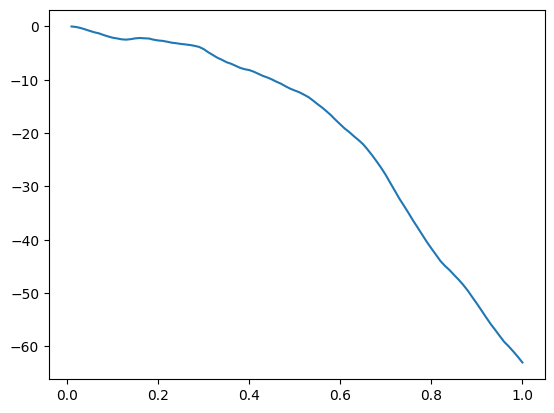

In [ ]:
dt = 0.01
T = 100
ts = jnp.linspace(dt, dt * T, T)

key = jax.random.PRNGKey(100)
ws = jnp.cumsum(jnp.sqrt(dt) * jax.random.normal(key, (T, ))) # Wiener process at times

def scan_body(carry, elem):
    x = carry
    dw = elem

    x = x + jnp.sin(10 * jnp.pi * x) * dt + dw
    return x, x

_, xs = jax.lax.scan(scan_body, jnp.array(0.1), ws)
plt.plot(ts, xs)